In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
daily_activity=pd.read_csv("C:\\Users\\Aradhya Singh\\Downloads\\dailyActivity_merged.csv")
weight=pd.read_csv("C:\\Users\\Aradhya Singh\\Downloads\\weightLogInfo_merged.csv")
daily_sleep=pd.read_csv("C:\\Users\\Aradhya Singh\\Downloads\\sleepDay_merged.csv")
hourly_calories=pd.read_csv("C:\\Users\\Aradhya Singh\\Downloads\\hourlyCalories_merged.csv")
hourly_steps=pd.read_csv("C:\\Users\\Aradhya Singh\\Downloads\\hourlySteps_merged.csv")
heart_rate=pd.read_csv("C:\\Users\\Aradhya Singh\\Downloads\\heartrate_seconds_merged.csv")


In [76]:
daily_sleep.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
5,1503960366,4/19/2016 12:00:00 AM,1,304,320
6,1503960366,4/20/2016 12:00:00 AM,1,360,377
7,1503960366,4/21/2016 12:00:00 AM,1,325,364
8,1503960366,4/23/2016 12:00:00 AM,1,361,384
9,1503960366,4/24/2016 12:00:00 AM,1,430,449


In [77]:
daily_activity.info()

weight.info()

daily_sleep.info()

hourly_calories.info()

hourly_steps.info()

heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [78]:
daily_activity.Id.nunique()

33

In [79]:
daily_sleep.Id.nunique()

24

In [80]:
hourly_calories.Id.nunique()

33

In [81]:
hourly_steps.Id.nunique()

33

In [82]:
heart_rate.Id.nunique()

14

In [83]:
weight.Id.nunique()

8

In [84]:
daily_activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [85]:
daily_sleep.isnull().any()

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool

In [86]:
heart_rate.isnull().any()

Id       False
Time     False
Value    False
dtype: bool

In [87]:
weight.isnull().any()

Id                False
Date              False
WeightKg          False
WeightPounds      False
Fat                True
BMI               False
IsManualReport    False
LogId             False
dtype: bool

In [88]:
hourly_calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

In [89]:
hourly_steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [90]:
print(daily_activity.duplicated().sum())
print(daily_sleep.duplicated().sum())
print(hourly_calories.duplicated().sum())
print(hourly_steps.duplicated().sum())
print(heart_rate.duplicated().sum())

0
3
0
0


0


In [91]:
daily_sleep.drop_duplicates(inplace=True)

In [92]:
daily_sleep.duplicated().sum()

0

Data Transformation

In [93]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})
daily_sleep=daily_sleep.rename(columns={'SleepDay':'Date'})
hourly_calories=hourly_calories.rename(columns={'ActivityHour':'Time'})
hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})


In [94]:
daily_activity.Date = pd.to_datetime(daily_activity.Date) 

daily_sleep.Date = pd.to_datetime(daily_sleep.Date)

hourly_steps.Time = pd.to_datetime(hourly_steps.Time)

hourly_calories.Time = pd.to_datetime(hourly_steps.Time)

C:\conda_tmp\ipykernel_22932\114665244.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_sleep.Date = pd.to_datetime(daily_sleep.Date)
C:\conda_tmp\ipykernel_22932\114665244.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps.Time = pd.to_datetime(hourly_steps.Time)


In [95]:
daily_activity['Date']

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: Date, Length: 940, dtype: datetime64[ns]

In [96]:
hourly_calories['Time']

0       2016-04-12 00:00:00
1       2016-04-12 01:00:00
2       2016-04-12 02:00:00
3       2016-04-12 03:00:00
4       2016-04-12 04:00:00
                ...        
22094   2016-05-12 10:00:00
22095   2016-05-12 11:00:00
22096   2016-05-12 12:00:00
22097   2016-05-12 13:00:00
22098   2016-05-12 14:00:00
Name: Time, Length: 22099, dtype: datetime64[ns]

In [97]:
merge_activity=pd.merge(daily_activity, daily_sleep,left_on=['Id', 'Date'], right_on=['Id','Date'],how='inner')

In [98]:
merge_activity.info()
merge_activity.Id.nunique()
merge_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   Date                      410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [99]:
hourly_activity=pd.merge(hourly_calories, hourly_steps,how='inner', on=['Id','Time'])
hourly_activity.info()
hourly_activity.Id.nunique()
hourly_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         22099 non-null  int64         
 1   Time       22099 non-null  datetime64[ns]
 2   Calories   22099 non-null  int64         
 3   StepTotal  22099 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 690.7 KB


,Id,Time,Calories,StepTotal
0,1503960366,2016-04-12 00:00:00,81,373
1,1503960366,2016-04-12 01:00:00,61,160
2,1503960366,2016-04-12 02:00:00,59,151
3,1503960366,2016-04-12 03:00:00,47,0
4,1503960366,2016-04-12 04:00:00,48,0


In [100]:
print(daily_activity.Date.min())
print(daily_activity.Date.max())

2016-04-12 00:00:00
2016-05-12 00:00:00


In [101]:
Data_duartion= daily_activity.Date.max()-daily_activity.Date.min()
Data_duartion

Timedelta('30 days 00:00:00')

In [102]:
daily_activity[['TotalSteps','TotalDistance','Calories']].describe()

,TotalSteps,TotalDistance,Calories
count,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,2303.609574
std,5087.150742,3.924606,718.166862
min,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,1828.500000
50%,7405.500000,5.245000,2134.000000
75%,10727.000000,7.712500,2793.250000
max,36019.000000,28.030001,4900.000000


In [103]:
round(daily_activity.agg({'TotalSteps':['mean','max','min'],'TotalDistance':['mean','max','min'],'Calories':['mean','max','min']}),2)

,TotalSteps,TotalDistance,Calories
mean,7637.91,5.49,2303.61
max,36019.00,28.03,4900.00
min,0.00,0.00,0.00


In [104]:
daily_activity

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [105]:
daily_activity_users=daily_activity.groupby('Id').agg({'TotalSteps':'mean','Calories':'mean'})
daily_activity_users.head(10)

,TotalSteps,Calories
Id,,
1503960366,12116.741935,1816.419355
1624580081,5743.903226,1483.354839
1644430081,7282.966667,2811.300000
1844505072,2580.064516,1573.483871
1927972279,916.129032,2172.806452
2022484408,11370.645161,2509.967742
2026352035,5566.870968,1540.645161
2320127002,4716.870968,1724.161290
2347167796,9519.666667,2043.444444


In [106]:
def categoriser(i):
    if i<5000:
        return 'Sedentary'
    elif i>=5000 and i<7000:
        return 'Lightly Active'
    elif i>=7000 and i<=10000:
        return 'Fairly Active'
    else:
        return 'Very Active'
    
daily_activity_users['Category']=daily_activity_users['TotalSteps'].apply(categoriser)
daily_activity_users.head(10)

,TotalSteps,Calories,Category
Id,,,
1503960366,12116.741935,1816.419355,Very Active
1624580081,5743.903226,1483.354839,Lightly Active
1644430081,7282.966667,2811.300000,Fairly Active
1844505072,2580.064516,1573.483871,Sedentary
1927972279,916.129032,2172.806452,Sedentary
2022484408,11370.645161,2509.967742,Very Active
2026352035,5566.870968,1540.645161,Lightly Active
2320127002,4716.870968,1724.161290,Sedentary
2347167796,9519.666667,2043.444444,Fairly Active


In [107]:
activity_category= daily_activity_users['Category'].value_counts()
activity_category

Category
Fairly Active     13
Sedentary          8
Very Active        7
Lightly Active     5
Name: count, dtype: int64

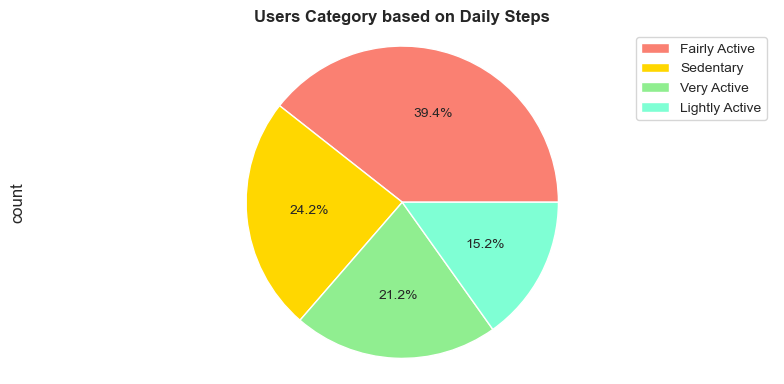

In [108]:
custom_colors=['salmon','gold','lightgreen','aquamarine']

activity_category.plot(kind='pie',figsize=(8,4), labels= None, autopct='%0.1f%%', fontsize=10, colors=custom_colors,startangle=0, wedgeprops=dict(edgecolor='w'))
plt.title('Users Category based on Daily Steps', fontdict={'fontweight':'bold'},fontsize=12)
plt.axis('equal')
plt.legend(labels=activity_category.index,prop={'size':10})
plt.tight_layout()

In [109]:
daily_activity['Day']=daily_activity['Date'].dt.day_name()

In [110]:
daily_activity.groupby('Day').agg({'TotalSteps':'mean'}).sort_values('TotalSteps',ascending=False)

,TotalSteps
Day,
Saturday,8152.975806
Tuesday,8125.006579
Monday,7780.866667
Wednesday,7559.373333
Friday,7448.230159
Thursday,7405.836735
Sunday,6933.231405


In [111]:
from pandas.core.dtypes.dtypes import CategoricalDtype

ctgs = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ctgs_type= CategoricalDtype(categories=ctgs,ordered=True)

daily_activity['Day']=daily_activity['Day'].astype(ctgs_type)

df_weekday= daily_activity.copy().groupby('Day').mean().reindex(ctgs)


C:\conda_tmp\ipykernel_22932\1967800036.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weekday= daily_activity.copy().groupby('Day').mean().reindex(ctgs)


In [112]:
df_weekday.filter(['TotalSteps','TotalDistance','Calories'])

,TotalSteps,TotalDistance,Calories
Day,,,
Monday,7780.866667,5.552917,2324.208333
Tuesday,8125.006579,5.832237,2356.013158
Wednesday,7559.373333,5.488333,2302.620000
Thursday,7405.836735,5.312245,2199.571429
Friday,7448.230159,5.309921,2331.785714
Saturday,8152.975806,5.854677,2354.967742
Sunday,6933.231405,5.027190,2263.000000


c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([6800., 7000., 7200., 7400., 7600., 7800., 8000., 8200., 8400.]),
 [Text(0, 6800.0, '6800'),
  Text(0, 7000.0, '7000'),
  Text(0, 7200.0, '7200'),
  Text(0, 7400.0, '7400'),
  Text(0, 7600.0, '7600'),
  Text(0, 7800.0, '7800'),
  Text(0, 8000.0, '8000'),
  Text(0, 8200.0, '8200'),
  Text(0, 8400.0, '8400')])

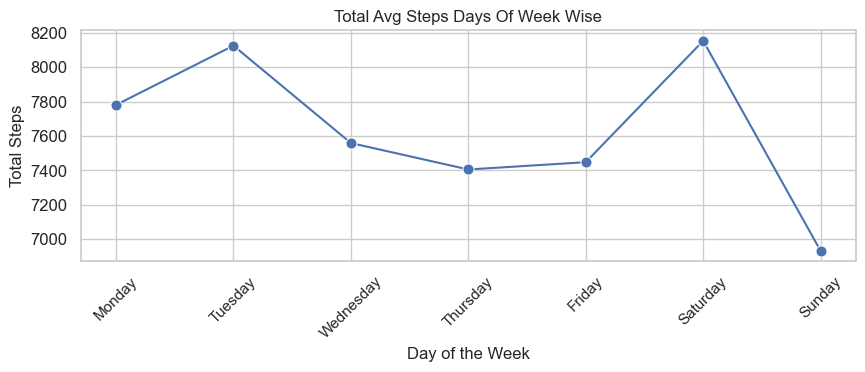

In [113]:
weekdays_summary=df_weekday.filter(['TotalSteps','TotalDistance','Calories'])
plt.figure(figsize=(10,3))

sns.set(style="whitegrid")

sns.lineplot(data = weekdays_summary['TotalSteps'], marker='o', markersize=8, color='b')
plt.xlabel("Day of the Week")
plt.ylabel("Total Steps")
plt.title("Total Avg Steps Days Of Week Wise")

plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)


Text(0.5, 1.0, 'Scatter Plot : Calories vs TotalSteps')

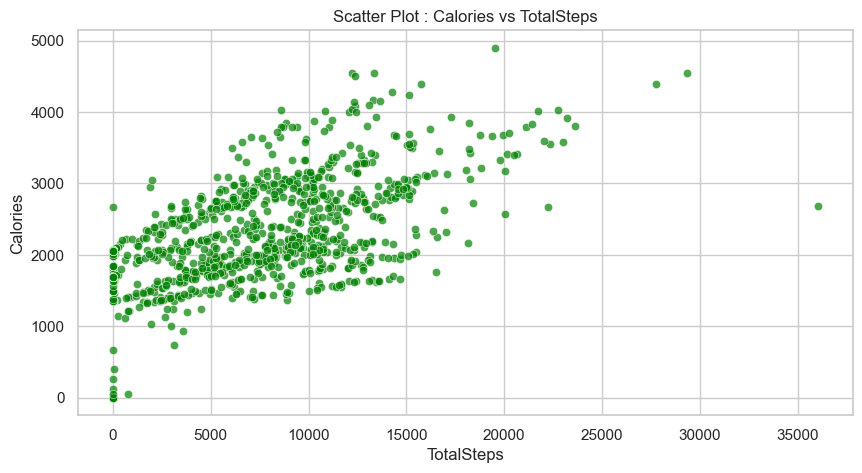

In [114]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

sns.scatterplot(data=daily_activity, x = 'TotalSteps', y = 'Calories',alpha=0.7, color='green')

plt.title('Scatter Plot : Calories vs TotalSteps')


In [115]:
daily_activity[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].describe()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,940.000000,940.000000,940.000000,940.000000
mean,21.164894,13.564894,192.812766,991.210638
std,32.844803,19.987404,109.174700,301.267437
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000,729.750000
50%,4.000000,6.000000,199.000000,1057.500000
75%,32.000000,19.000000,264.000000,1229.500000
max,210.000000,143.000000,518.000000,1440.000000


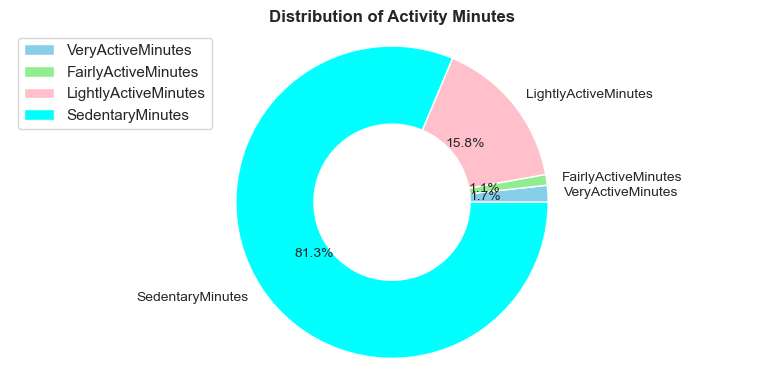

In [116]:
daily_activemin_ctg = daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

colorop = ['skyblue', 'lightgreen','pink', 'cyan']

plt.figure(figsize=(8, 4))
plt.pie(daily_activemin_ctg, labels=daily_activemin_ctg.index, autopct='%0.1f%%', colors=colorop, textprops={'fontsize': 10}, wedgeprops=dict(width=0.5))

plt.title('Distribution of Activity Minutes', fontdict={'fontweight': 'bold'})
plt.tight_layout()
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

In [117]:
daily_sleep.Date.max()-daily_activity.Date.min()

Timedelta('30 days 00:00:00')

In [118]:
daily_sleep[['TotalMinutesAsleep','TotalTimeInBed']].describe()

,TotalMinutesAsleep,TotalTimeInBed
count,410.000000,410.000000
mean,419.173171,458.482927
std,118.635918,127.455140
min,58.000000,61.000000
25%,361.000000,403.750000
50%,432.500000,463.000000
75%,490.000000,526.000000
max,796.000000,961.000000


c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


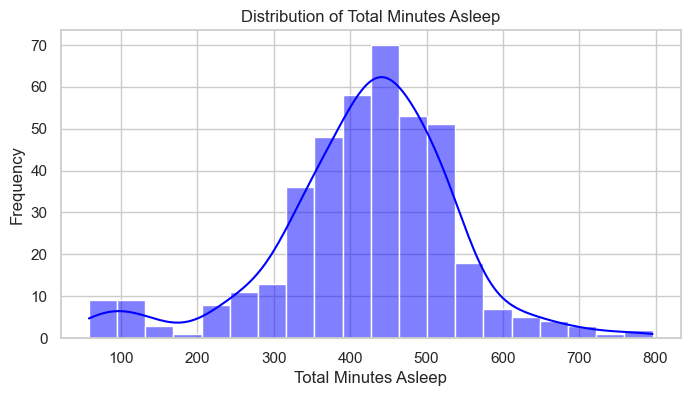

In [119]:
plt.figure(figsize=(8,4))

sns.histplot(daily_sleep['TotalMinutesAsleep'],kde='True',color='blue',bins=20)
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.title('Distribution of Total Minutes Asleep')
plt.grid(True)

In [120]:
merge_activity['Day']=merge_activity['Date'].dt.day_name()


In [121]:
merge_activity['Day']=merge_activity['Day'].astype(ctgs_type)
merge_activity

days=merge_activity.groupby('Day').mean()
days.filter(['Day','TotalMinutesAsleep','TotalTimeInBed'])

C:\conda_tmp\ipykernel_22932\1464782515.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days=merge_activity.groupby('Day').mean()


,TotalMinutesAsleep,TotalTimeInBed
Day,,
Monday,419.500000,457.347826
Tuesday,404.538462,443.292308
Wednesday,434.681818,470.030303
Thursday,401.296875,434.875000
Friday,405.421053,445.052632
Saturday,419.070175,459.842105
Sunday,452.745455,503.509091


c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


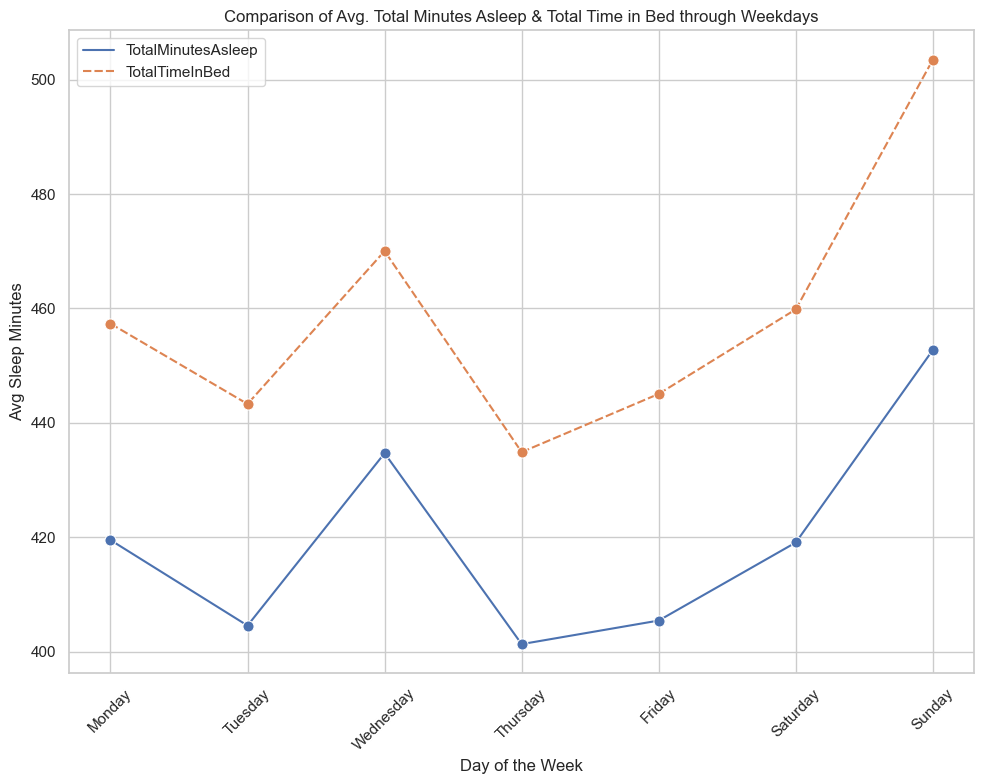

In [122]:
weekdays=days.filter(['Day','TotalMinutesAsleep','TotalTimeInBed'])
plt.figure(figsize=(10,8))

sns.lineplot(data=weekdays,marker='o',markersize=8)

plt.xlabel('Day of the Week')
plt.ylabel('Avg Sleep Minutes')
plt.title('Comparison of Avg. Total Minutes Asleep & Total Time in Bed through Weekdays')

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()

In [123]:
weekdays['IdleTime']=weekdays['TotalTimeInBed']-weekdays['TotalMinutesAsleep']
weekdays

,TotalMinutesAsleep,TotalTimeInBed,IdleTime
Day,,,
Monday,419.500000,457.347826,37.847826
Tuesday,404.538462,443.292308,38.753846
Wednesday,434.681818,470.030303,35.348485
Thursday,401.296875,434.875000,33.578125
Friday,405.421053,445.052632,39.631579
Saturday,419.070175,459.842105,40.771930
Sunday,452.745455,503.509091,50.763636


In [124]:
weekdays['IdleTime'].mean()

39.52791817497909

c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


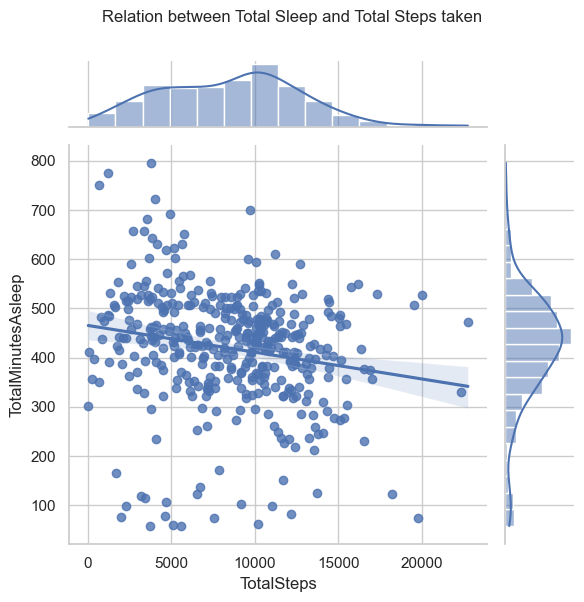

In [125]:
sns.jointplot(data=merge_activity,x='TotalSteps',y='TotalMinutesAsleep',kind='reg')
plt.suptitle('Relation between Total Sleep and Total Steps taken',y=1.0,fontsize=12)
plt.tight_layout()


In [126]:
hourlyactivity_duration=hourly_activity.Time.max()-hourly_activity.Time.min()
hourlyactivity_duration

Timedelta('30 days 15:00:00')

In [127]:
hourly_activity['Hour']=hourly_activity['Time'].dt.hour
hourly_activity.head()

,Id,Time,Calories,StepTotal,Hour
0,1503960366,2016-04-12 00:00:00,81,373,0
1,1503960366,2016-04-12 01:00:00,61,160,1
2,1503960366,2016-04-12 02:00:00,59,151,2
3,1503960366,2016-04-12 03:00:00,47,0,3
4,1503960366,2016-04-12 04:00:00,48,0,4


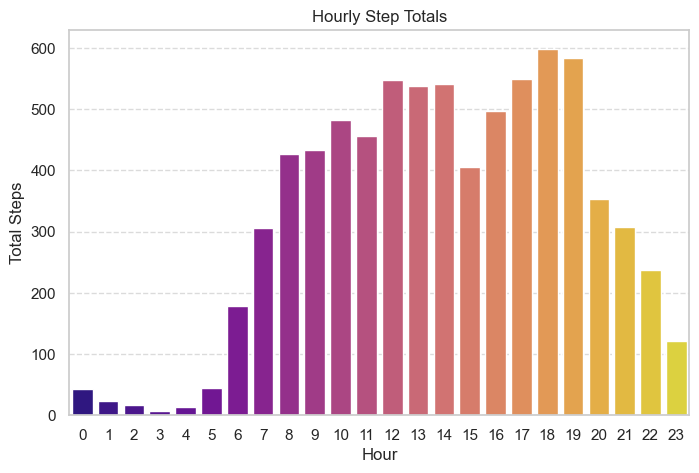

In [128]:
hourly_stepsdata = hourly_activity.groupby('Hour').agg({'StepTotal':'mean'})
hourly_stepsdata

plt.figure(figsize=(8,5))
sns.barplot(data=hourly_stepsdata, x = hourly_stepsdata.index , y= 'StepTotal', palette='plasma')

plt.title('Hourly Step Totals')
plt.xlabel('Hour')
plt.ylabel('Total Steps')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

Text(0, 0.5, 'Average Calories Burned')

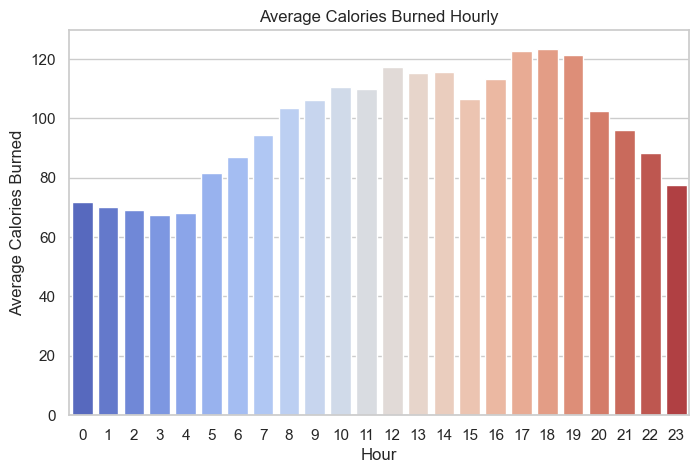

In [129]:
hourly_caloriesdata=hourly_activity.groupby('Hour').agg({'Calories':'mean'})
hourly_caloriesdata

plt.figure(figsize=(8,5))
sns.barplot(data=hourly_caloriesdata, x=hourly_caloriesdata.index, y='Calories', palette='coolwarm')


plt.title('Average Calories Burned Hourly')
plt.xlabel('Hour')
plt.ylabel('Average Calories Burned')


c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

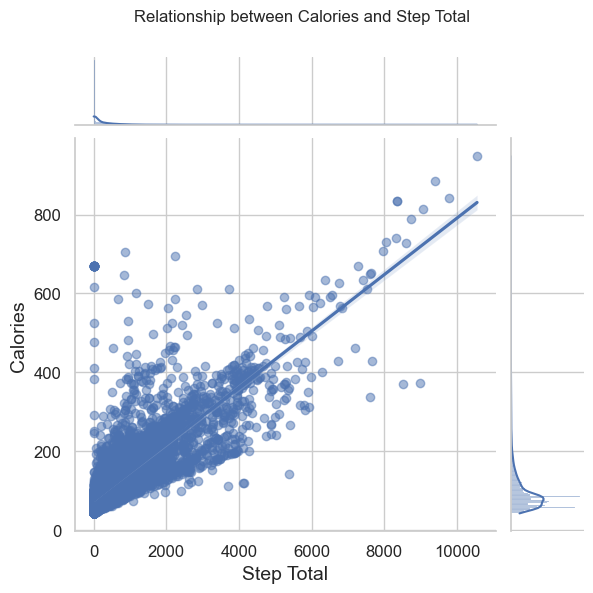

In [130]:
plt.figure(figsize=(10, 8))
joint_plot = sns.jointplot(data=hourly_activity, y='Calories', x='StepTotal', kind='reg', scatter_kws={'alpha': 0.5})

plt.ylabel('Calories', fontsize=14)
plt.xlabel('Step Total', fontsize=14)
plt.subplots_adjust(top=0.9)  
joint_plot.fig.suptitle('Relationship between Calories and Step Total', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [131]:
daily_activity.Date.nunique()

31

In [132]:
app_use_freq=daily_activity.groupby('Id')['Date'].count().reset_index()
app_use_freq.rename(columns={'Date':'AppUserFrequency'},inplace=True)

app_use_freq.sort_values('AppUserFrequency')

,Id,AppUserFrequency
13,4057192912,4
8,2347167796,18
28,8253242879,19
10,3372868164,20
25,7007744171,26
23,6775888955,26
21,6117666160,28
31,8792009665,29
22,6290855005,29
2,1644430081,30


In [133]:
def freq_ctg(num):
    if num>=1 and num<=10:
        return "low use"
    elif num >= 11 and num <=20:
        return "moderate use"
    elif num >=21 and num <=31:
        return "high use"

app_use_freq['Category']=app_use_freq['AppUserFrequency'].apply(freq_ctg)
app_use_freq       

,Id,AppUserFrequency,Category
0,1503960366,31,high use
1,1624580081,31,high use
2,1644430081,30,high use
3,1844505072,31,high use
4,1927972279,31,high use
5,2022484408,31,high use
6,2026352035,31,high use
7,2320127002,31,high use
8,2347167796,18,moderate use
9,2873212765,31,high use


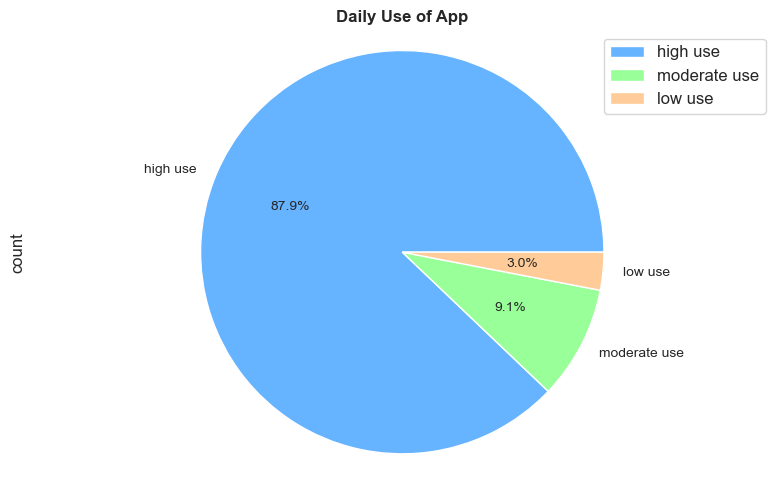

In [134]:
user_freq = app_use_freq['Category'].value_counts()
user_freq 

colorop = ['#66b3ff', '#99ff99', '#ffcc99']

user_freq.plot(kind='pie',figsize=(8,5), autopct='%0.1f%%', colors = colorop, fontsize = '10', wedgeprops=dict(edgecolor='w'))

plt.title('Daily Use of App', fontdict={'fontweight': 'bold'})

plt.legend()

plt.axis('equal')
plt.tight_layout()

plt.axis('equal')
plt.tight_layout()                                                             #<-- this function adujst sapce and avoid overlaping of details in chart
plt.legend(labels=user_freq.index, prop={'size': 12})